# Introduction to Natural Language Processing

----------------------------------------------------
Machine Learning    

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es*, *Emilio Parrado Hernández emipar@tsc.uc3m.es* and *Pablo M. Olmos olmos@tsc.uc3m.es*

----------------------------------------------------


In [ ]:
%matplotlib inline
# Figures plotted inside the notebook
%config InlineBackend.figure_format = 'svg'
# High quality figures
import matplotlib.pyplot as plt
import numpy as np
import time

# Introduction

In general, much of the way we communicate today is through text, whether in messaging services, social media and/or email. So, for example, on services/applications such as TripAdvisor, Booking, Amazon, etc., users write reviews of restaurants/businesses, hotels, products to share their opinions about their experience. These reviews, all written in plain text format, contain a lot of information that would be useful to answer business-relevant questions using machine learning methods, for example, to predict the best restaurant in a certain area or even which one best suits my needs, to know if TripAdvisor or Booking reviews are positive or negative (*Sentiment Analysis*), or to analyze news (detect *fake news*).

In order to work with this information, from these unformatted texts, we have to extract the necessary information (if possible including semantic content) and vectorize it properly to feed it to machine learning based models.

This type of task (preprocessing) is called **Natural Language Processing** (NLP).
NLP is a subfield of linguistics, computer science and artificial intelligence that deals with the interactions between computers (or processors) and human language; in particular it encompasses a set of techniques to enable computers to process and analyze large amounts of text.

In this course we will look at different techniques and learning models to extract as much information as possible from collections of text and add value to it, but in this session we will focus on the preprocessing of this information. How to make this heterogeneous, sometimes noisy and usually unstructured information into a useful format for our learning models.


# Pipeline for text processing

As we know, ML algorithms process numbers, not words, so we need to transform text into meaningful numbers that contain the relevant information of the documents. This process of converting text to numbers is what we will call **vectorization**.

However, in order to have a useful representation, some prior **preprocessing** steps are usually required to clean and homogenize the documents: tokenization, *stop-words* removal, lemmatization, etc.
The following figure shows the different steps we must follow to process our documents until they can be used by our learning model:

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/NLP/PipelineNLP.png" width="80%">

Throughout this notebook, we will look at some of the tools we have available in Python to carry out all these steps prior to deploying machine or statistical learning models. Specifically, we will focus on the use of these libraries:
* [NLTK, Natural Language ToolKit](https://www.nltk.org/). This library is an excellent NLP library written in Python by experts from both academia and industry. NLTK allows to create applications with textual data quickly, as it provides a set of basic classes to work with data corpora, including text collections (corpora), keyword lists, classes to represent and operate with text type data (documents, phrases, words, ...) and functions to perform common NLP tasks (tokenization, word count, ...). NLTK is going to be of great help for document preprocessing.

* [SpaCy](https://spacy.io/). A open source library for advanced natural language processing in Python. SpaCy is specifically designed for production use. Unlike NLTK, SpaCy has an object-oriented structure. For example, when tokenizing text, each token is an object with specific attributes and properties. Spacy supports more than 64 languages, including statistical models already trained for [25 of them](https://spacy.io/usage/models) (including word embeddings and models based on [transformers](https://spacy.io/usage/v3), the latest revolution in NLP).

* [Gensim](https://pypi.org/project/gensim/) is another Python library for performing topic modeling (*topic modeling*), document indexing and document information retrieval tasks. It is designed to operate with large amounts of information (with efficient and parallelizable/distributed implementations) and will be of great help for the vectorization of our data corpora once preprocessed.

* [Sklearn](https://scikit-learn.org/stable/index.html). Sklearn is a library mainly intended for the design of machine learning models for classification and regression, but it also includes some functionalities for text preprocessing that we will review later.

There are also other libraries such as [CoreNLP](https://stanfordnlp.github.io/CoreNLP/), [Huggin Face](https://huggingface.co/transformers/) or packages included in Pytorch, Tensorflow that allow us to perform some of these tasks, but we will introduce them later in other sessions of this course.

Let's start this notebook by loading the NLTK library and some of its functionalities. Then, we will choose a corpus of data to analyzing the basic functionalities provided by NLTK, SpaCy, Gensim and Sklearn for document preprocessing and we will see, one by one, what the different steps of our pipeline consist of and how we can implement them.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# 1. Loading our data corpus

NLTK includes different data corpora to test our tools with. We can find information about all of them at [NLTK corpus](https://www.nltk.org/book/ch02.html).


## The CorpusReader object
To start working we are going to use the corpus **movie_reviews**, one of the data corpus included in NLTK and consisting of 2000 text documents with reviews of different movies where it is also indicated if these reviews are positive or negative.

The following code cell shows how to load the corpus...

In [ ]:
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
movie_reviews

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


<CategorizedPlaintextCorpusReader in '/root/nltk_data/corpora/movie_reviews'>

When loading the corpus, an object of type `CorpusReader`, named `movie_reviews`, is generated with the contents of the corpus. Since a corpus is a collection of documents/texts, we can see which documents compose this corpus using the `.fileids()` function.

In [ ]:
len(movie_reviews.fileids())

2000

In [ ]:
movie_reviews.fileids()[:10]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt']

We can also see the categories of this problem with the `.categories()` attribute.

In [ ]:
movie_reviews.categories()

['neg', 'pos']

In [ ]:
movie_reviews.categories('neg/cv000_29416.txt')

['neg']

If we want we can access a specific **document** in the corpus and extract its raw content with the `.raw()` function.

In [ ]:
raw_text = movie_reviews.raw('neg/cv007_4992.txt')
print(raw_text)

that's exactly how long the movie felt to me . 
there weren't even nine laughs in nine months . 
it's a terrible mess of a movie starring a terrible mess of a man , mr . hugh grant , a huge dork . 
it's not the whole oral-sex/prostitution thing ( referring to grant , not me ) that bugs me , it's the fact that grant is annoying . 
not just adam sandler-annoying , we're talking jim carrey-annoying . 
since when do eye flutters and nervous smiles pass for acting ? 
but , on the other hand , since when do really bad slapstick ( a fistfight in the delivery room culminating in grant's head in joan cusack's lap--a scene he paid $60 to have included in the movie ) and obscene double entendres ( robin williams , the obstetrician , tells grant's pregnant girlfriend she has " a big pussy , " referring of course to the size of the cat hairs on her coat , but nonetheless , grant paid $60 to have the exchange included in the movie ) pass for comedy ? 
nine months is a predictable cookie-cutter movie

# 2. Preprocessing of the corpus

Before transforming the text input data into a vector representation, we need to structure and clean the text, and keep all the information that allows us to capture the semantic content of the corpus. Normally, a vector is obtained for each text, but depending on the application it may be of interest to obtain a vector for each sentence, for each paragraph or even for each word.

For this purpose, the typical NLP processing applies the following steps:

1. Tokenization
2. Cleaning
3. Homogenization

Note that, although we define this sequence of steps here, we will see that depending on how they are applied, their order may vary.

## 2.1. Tokenization

Tokenization is the process of breaking the given text into smaller pieces called tokens. Words, numbers, punctuation marks and others can be considered as tokens.

NLTK includes generic functions to perform these operations on any text string. Specifically, it has two functions:
- `sent_tokenize`: is a phrase tokenizer. This tokenizer splits a text into a list of sentences. To decide where a sentence starts or ends NLTK has a pre-trained model for the specific language we are working on. We have loaded this model at the beginning with `nltk.download('punkt')`.
- `word_tokenize`/`wordpunct_tokenize`: Splits a text into words or other individual characters such as punctuation marks.

Let's see examples of the use of these functions with the following text:

In [ ]:
# Define a text as a string
texto = 'I\'m a dog and it\'s great! You\'re cool and Sandy\'s book is big. Don\'t tell her, you\'ll regret it! "Hey", she\'ll say!'
print(texto)

I'm a dog and it's great! You're cool and Sandy's book is big. Don't tell her, you'll regret it! "Hey", she'll say!


In [ ]:
# Divide the text into sentences
sent=nltk.sent_tokenize(texto)
print(sent)

["I'm a dog and it's great!", "You're cool and Sandy's book is big.", "Don't tell her, you'll regret it!", '"Hey", she\'ll say!']


In [ ]:
# Divide the text into tokens, using as splitter white spaces and punctuation
sent_tokens1=nltk.wordpunct_tokenize(texto)
print(sent_tokens1)

['I', "'", 'm', 'a', 'dog', 'and', 'it', "'", 's', 'great', '!', 'You', "'", 're', 'cool', 'and', 'Sandy', "'", 's', 'book', 'is', 'big', '.', 'Don', "'", 't', 'tell', 'her', ',', 'you', "'", 'll', 'regret', 'it', '!', '"', 'Hey', '",', 'she', "'", 'll', 'say', '!']


In [ ]:
# Divide the text into tokens, using as splitter white spaces, but punctuation
# of contractions are not included
sent_tokens2=nltk.word_tokenize(texto)
print(sent_tokens2)

['I', "'m", 'a', 'dog', 'and', 'it', "'s", 'great', '!', 'You', "'re", 'cool', 'and', 'Sandy', "'s", 'book', 'is', 'big', '.', 'Do', "n't", 'tell', 'her', ',', 'you', "'ll", 'regret', 'it', '!', '``', 'Hey', "''", ',', 'she', "'ll", 'say', '!']


Although it may seem that the `wordpunct_tokenize` and `word_tokenize` functions do the same thing, with this example we see that `wordpunct_tokenize` allows you to separate punctuation marks while `word_tokenize` does not.  Note the difference when splitting `I'm` between the two functions.

## 2.2. Cleaning and homogenization

Looking at the tokens in the corpus we can see that there are many tokens with some letters in uppercase and others in lowercase, the same token sometimes appearing in singular and sometimes in plural, or the same verb appearing in different verb tenses. In order to semantically analyze the text, we are interested in **homogenizing** words that are formally different but have the same meaning. In this process, logically, we are losing information about style, meaning, the writer's intention or other aspects; however, what matters to us is the content (subject matter) of the text and in this way we are going to reinforce it for the posterior vectorization.

For this we can use the NLTK lemmatization tools. The usual homogenization process consists of the following steps:

1. Removal of uppercase and non-alphanumeric characters.

2. Cleaning: this preprocessing step consists of removing irrelevant words or **stop words** from the documents.


3. Stemming/Lemmatization: remove word endings to preserve the root of words and ignore grammatical information (we remove marks of plurals, gender, verb conjugations, ...).

In this step, we can detect typos or misspellings that we could correct.

Let's see how to apply each of these steps one by one.

#### 2.2.1. Capitalization and punctuation removal

Usually, uppercase alphabetic characters are transformed into their corresponding lowercase characters and the non-alphanumeric characters, e.g. punctuation marks, are eliminated.

#### 2.2.2. Stop-word removal

This preprocessing step consists of removing irrelevant words or **stop words** from documents. The **stop words** are the most common words in a language such as "the", "a", "about", "is", "all". These words do not have an important meaning and are usually removed from texts. To implement this process, specific libraries containing this list of words are loaded for each language.



In [ ]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')
print('The numer of stopwords is %d' %len(stopwords_en))
print(stopwords_en)

The numer of stopwords is 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 

Note that the English stopwords are designed to remove typical language contractions.....

In [ ]:
from nltk.corpus import stopwords
stopwords_es = stopwords.words('spanish')
print('The numer of stopwords is %d' %len(stopwords_es))
print(stopwords_es)


The numer of stopwords is 313
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'e

Let's see how to apply it with an example:

In [ ]:
# We define a text and tokenize it
text = nltk.wordpunct_tokenize('I\'m a dog and it\'s great! You\'re cool and Sandy\'s book is big. Don\'t tell her, you\'ll regret it! "Hey", she\'ll say!')
print(text)

['I', "'", 'm', 'a', 'dog', 'and', 'it', "'", 's', 'great', '!', 'You', "'", 're', 'cool', 'and', 'Sandy', "'", 's', 'book', 'is', 'big', '.', 'Don', "'", 't', 'tell', 'her', ',', 'you', "'", 'll', 'regret', 'it', '!', '"', 'Hey', '",', 'she', "'", 'll', 'say', '!']


In [ ]:
# We remove the stopwords
clean_text1 = [token for token in text if (token not in stopwords_en)]
print(clean_text1)

['I', "'", 'dog', "'", 'great', '!', 'You', "'", 'cool', 'Sandy', "'", 'book', 'big', '.', 'Don', "'", 'tell', ',', "'", 'regret', '!', '"', 'Hey', '",', "'", 'say', '!']


#### 2.2.3. Stemming and Lemmatization

In common language, words can take different forms indicating gender, quantity, tense (in the case of verbs), concrete forms for nouns/adjectives or adverbs, ... For many applications, it is useful to normalize these forms into some canonical word that facilitates their analysis. There are two ways to accomplish this process:

1. The **stemming** process reduces words to their base or root.
    
2. The goal of **lematization**, like stemmer, is to reduce inflectional forms to a common base form. Unlike stemming, lemmatization does not simply cut inflections. Instead, it uses lexical knowledge bases to derive the correct base forms of words.

Here, we are going to focus on the Lemmatization. Lemmatization in NLTK is based on the lexicon from [WordNet](https://wordnet.princeton.edu/). WordNet is a semantically oriented English dictionary, it includes WordNet English with 155,287 words and 117,659 synonym sets.

Let's see how lemmatization works with an example:   

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer


text = nltk.word_tokenize("The women running in the fog passed bunnies working as computer scientists.")

# Try lemmatizer
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in text]
lematizado1 = " ".join(lemmas)
print(lematizado1)


The woman running in the fog passed bunny working a computer scientist .


Compare how different processes transform words like `women`, `running` or `computer`.

One of the advantages of lemmatization is that the result remains a word, which is more desirable for the presentation of word processing results.

However, without using contextual information, `lemmatize()` does not eliminate grammatical differences. For this reason, `running` or `passed` are retained and not replaced by the infinitive `run` or `pass`.

As an alternative, we can apply `.lemmatize(word, pos)`, where `pos` is a string code that specifies grammatical function of the words in your sentence (PoS stands for *Part of Speech*). For example, you can check the difference between `wnl.lemmatize('running')` and `wnl.lemmatize('running', pos='v')`.


In [ ]:
print(lemmatizer.lemmatize('running'))
print(lemmatizer.lemmatize('running', pos='v'))

running
run


## 2.3 Text preprocessing or normalization pipeline

Complete the following exercises over the following document.

In [ ]:
# Get a text
movie_text = movie_reviews.raw('neg/cv000_29416.txt')
movie_text

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

#### Exercise 1: Text Tokenization



Complete the following code cells to split the text into tokens (using the `wordpunct_tokenize` function) and print the resulting tokens. Call `movie_tokens` the output variable.

In [ ]:
#<SOL>
# Divide into words
movie_tokens=nltk.wordpunct_tokenize(movie_text)
print(movie_tokens)
#</SOL>

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', 'ba

##### **Exercise 2**: removing uppercase and non-alphanumeric characters

Convert all `movie_tokens` tokens to lowercase (using the `.lower()` method) and remove punctuation or non-alphanumeric tokens (which you can detect with the `.isalnum()` method). This processing can be coded in a single line of code using *list comprehension*.
Call `movie_tokens_filtered` the output variable.

In [ ]:
#<SOL>
# List of tokens with puntuation
print(movie_tokens)
t0 = time.time()
movie_tokens_filtered = [el.lower() for el in movie_tokens if el.isalnum()]
print('The time needed to remove the punctuation is: %2.4f ms'%(1000*(time.time()-t0)))
# Print the text without punctuation
print(movie_tokens_filtered)
#</SOL>

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', 'ba

##### **Exercise 3**: Stop-word removal

Apply the stop-word removal process on the `moview_reviews` text resulting from the previous filtering process (variable `movie_tokens_filtered` from Exercise 2). Call `movies_tokens_clean` the output variable.

In [ ]:
print('Filtered text:')
print(movie_tokens_filtered)
#<SOL>
movies_tokens_clean = [token for token in movie_tokens_filtered if (token not in stopwords_en)]
print('Filtered adn clean text:')
print(movies_tokens_clean)
#</SOL>

Filtered text:
['plot', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', 'drink', 'and', 'then', 'drive', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', 'and', 'has', 'nightmares', 'what', 's', 'the', 'deal', 'watch', 'the', 'movie', 'and', 'sorta', 'find', 'out', 'critique', 'a', 'mind', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', 'mess', 'with', 'your', 'head', 'and', 'such', 'lost', 'highway', 'memento', 'but', 'there', 'are', 'good', 'and', 'bad', 'ways', 'of', 'making', 'all', 'types', 'of', 'films', 'and', 'these', 'folks', 'just', 'didn', 't', 

##### **Exercise 4**: Lemmatization

Apply the lemmatization process on the `movie_reviews` text resulting from the previous filtering and cleaning process (variable `movies_tokens_clean` from Exercise 3). Call `movie_tokens_lemmas` the output variable.

In [ ]:
#<SOL>
movie_tokens_lemmas = [lemmatizer.lemmatize(t) for t in movies_tokens_clean]
print(movie_tokens_lemmas)
#</SOL>

['plot', 'two', 'teen', 'couple', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guy', 'dy', 'girlfriend', 'continues', 'see', 'life', 'nightmare', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mind', 'fuck', 'movie', 'teen', 'generation', 'touch', 'cool', 'idea', 'present', 'bad', 'package', 'make', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'film', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'way', 'making', 'type', 'film', 'folk', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problem', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'start', 'normal', 'downshift', 'fantasy', 'world', 'audience', 'member', 'idea', 'going', 'dream', 'character', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparition', 'disappearance', 'looooot', 'chase', 'scene', 'ton', 'weird', 'thing', 'happen', 'simp

#### **Exercise 5**: Function for text normalization

Complete the code for the following function so that you can do all the above steps in a single function and then try using it on one of the `movie_reviews` texts.

In [ ]:
## Load Modules
import string

lemmatizer  = WordNetLemmatizer()
stopwords_en   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    #<SOL>
    # change to lower case and remove punctuation
    text2 = text.lower().translate(str.maketrans(string.punctuation, ' '*(len(string.punctuation))))
    # we tokenize
    text_tokens = nltk.word_tokenize(text2)
    # we lemmatize and remove stop-words
    normalized_text  = [lemmatizer.lemmatize(t) for t in text_tokens if (t not in stopwords_en)]

    return normalized_text
    #</SOL>


In [ ]:
movie_text = movie_reviews.raw('neg/cv000_29416.txt')
print('Original text (first 200 characters...):')
print(movie_text[:200])
movie_text_preproc = normalize(movie_text)
print('*******************')
print('Preprocessed text:')
print(movie_text_preproc)

Original text (first 200 characters...):
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
w
*******************
Preprocessed text:
['plot', 'two', 'teen', 'couple', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guy', 'dy', 'girlfriend', 'continues', 'see', 'life', 'nightmare', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mind', 'fuck', 'movie', 'teen', 'generation', 'touch', 'cool', 'idea', 'present', 'bad', 'package', 'make', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'film', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'way', 'making', 'type', 'film', 'folk', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problem', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'st

#### Preprocessing of the complete data corpus

In order to be able to work from now on with all the documents of the data corpus, we will apply our preprocessing pipeline to all the documents of the `moview_reviews` data corpus and save the result in a list variable, called `corpus_prec`, where each element of the list will be a preprocessed text.


In [ ]:
corpus_prec = []
for fileid in movie_reviews.fileids():
  text = movie_reviews.raw(fileid)
  text_preproc = normalize(text)
  corpus_prec.append(text_preproc)

In [ ]:
print('Number of documents in the preprocessed corpus:')
print(len(corpus_prec))
print('**********')
print('Some of the elements of the first preprocessed document')
print(corpus_prec[0][:20])
print('**********')
print('Some of the elements of the second preprocessed document')
print(corpus_prec[1][:20])
print('**********')
print('Some of the elements of the third preprocessed document')
print(corpus_prec[3][:20])

Number of documents in the preprocessed corpus:
2000
**********
Some of the elements of the first preprocessed document
['plot', 'two', 'teen', 'couple', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guy', 'dy', 'girlfriend', 'continues', 'see', 'life', 'nightmare', 'deal']
**********
Some of the elements of the second preprocessed document
['happy', 'bastard', 'quick', 'movie', 'review', 'damn', 'y2k', 'bug', 'got', 'head', 'start', 'movie', 'starring', 'jamie', 'lee', 'curtis', 'another', 'baldwin', 'brother', 'william']
**********
Some of the elements of the third preprocessed document
['quest', 'camelot', 'warner', 'bros', 'first', 'feature', 'length', 'fully', 'animated', 'attempt', 'steal', 'clout', 'disney', 'cartoon', 'empire', 'mouse', 'reason', 'worried', 'recent', 'challenger']


## 2.4.  Text preprocessing with SpaCy


Text processing with SpaCy is straightforward. We load a pre-trained model for a given language, and pass in any text to be processed. SpaCy will run a series of processes (pipeline) on it and return a `doc` type object.
<figure>
<center>
<img src='https://spacy.io/images/pipeline.svg' width="800"></img>
<figcaption>From https://spacy.io/images/pipeline.svg</figcaption></center>
</figure>

The basic ingredients in SpaCy are:

   - `Language`: determined by loading the `model` and associated process pipeline. This `model` transforms text into spaCy objects.
   - `Doc`: Iterable sequence of `tokens`. Each `token` is an object with many attributes.
   - `Vocab`: Dictionary associated to the model.  


Since we are only going to cover some of the basics of SpaCy in this session, additional material can be found in the following resources:

- [SpaCy 101 course](https://spacy.io/usage/spacy-101)
- [Advanced Tutorial](https://course.spacy.io/en/)




In the following code, we download and import one of the [pre-trained statistical models for the English language](https://spacy.io/models/en)...

In [ ]:
# Download the model
!python -m spacy download en_core_web_sm

2023-11-16 14:35:48.846728: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 14:35:48.846792: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 14:35:48.846825: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 14:35:48.855951: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-16 14:35:50.061977: W tensorflow/compiler/

In [ ]:
import spacy

# We load the model
nlp = spacy.load("en_core_web_sm")

### SpaCy objects

Next, we are going to use the pipeline that we have loaded to analyze a text ...

In [ ]:
sentence2 = "I am an engineer. Some day I hope to engineer an electric engine"

print(sentence2)

doc = nlp(sentence2)

I am an engineer. Some day I hope to engineer an electric engine


`doc` is an iterable object, composed of objects of type [`token`](https://spacy.io/api/token). In the following loop we print some of the properties of those tokens determined by the pipeline we have loaded, including the POS tag:

In [ ]:
for token in doc:
    print(token.text, token.lemma_, token.tag_, token.is_alpha, token.is_stop,token.is_punct)
    print('*****')

I I PRP True True False
*****
am be VBP True True False
*****
an an DT True True False
*****
engineer engineer NN True False False
*****
. . . False False True
*****
Some some DT True True False
*****
day day NN True False False
*****
I I PRP True True False
*****
hope hope VBP True False False
*****
to to TO True True False
*****
engineer engineer VB True False False
*****
an an DT True True False
*****
electric electric JJ True False False
*****
engine engine NN True False False
*****


In table form ...

In [ ]:
import pandas as pd
spacy_pos_tagged = [(token.text, token.lemma_, token.tag_,token.is_alpha, token.is_stop,token.is_punct) for token in doc]

pd.DataFrame(spacy_pos_tagged, columns=['Word','Word_Lemma','POS tag','Is alpha','Is stopword','Is punct'])

,Word,Word_Lemma,POS tag,Is alpha,Is stopword,Is punct
0,I,I,PRP,True,True,False
1,am,be,VBP,True,True,False
2,an,an,DT,True,True,False
3,engineer,engineer,NN,True,False,False
4,.,.,.,False,False,True
5,Some,some,DT,True,True,False
6,day,day,NN,True,False,False
7,I,I,PRP,True,True,False
8,hope,hope,VBP,True,False,False
9,to,to,TO,True,True,False


With `spacy.explain()` we can get a description of the different tags ...

In [ ]:
spacy.explain("VBP")

'verb, non-3rd person singular present'

In [ ]:
spacy.explain("JJ")

'adjective (English), other noun-modifier (Chinese)'

The access to the model **vocabulary** is done through the `.vocab.strings` attribute.

In [ ]:
list_vocab = list(nlp.vocab.strings)

print("The size of the dictionary is {} words".format(len(list_vocab)))

# First 200
print(list_vocab[:200])

The size of the dictionary is 84780 words
['\t', '\t\t', '\t\x0b', '\t\x0c', '\t\r', '\t\x1c', '\t\x1d', '\t\x1e', '\t\x1f', '\t ', '\t\x85', '\t\x85\u1680', '\t\xa0', '\t\u1680', '\t\u2001', '\t\u2005', '\t\u2006', '\t\u2007', '\t\u2008', '\t\u2009', '\t\u200a', '\t\u2028', '\t\u205f', '\t\u3000', '\n', '\n\t', '\n\x0b', '\n\r', '\n\r\t', '\n\x1c', '\n ', '\n\u1680', '\n\u2001', '\n\u2002', '\n\u2003', '\n\u2004', '\n\u2005', '\n\u2006', '\n\u2007', '\n\u2008', '\n\u2009', '\n\u200a', '\n\u2029', '\n\u202f', '\n\u205f', '\n\u3000', '\x0b', '\x0b\n', '\x0b\x0b', '\x0b\x0c', '\x0b\r', '\x0b ', '\x0b\x85', '\x0b\xa0', '\x0b\u1680', '\x0b\u2001', '\x0b\u2002', '\x0b\u2003', '\x0b\u2005', '\x0b\u2005\u2000', '\x0b\u2006', '\x0b\u2007', '\x0b\u2008', '\x0b\u200a', '\x0b\u2028', '\x0b\u2029', '\x0b\u202f', '\x0b\u205f\u2007', '\x0b\u3000', '\x0c', '\x0c\t', '\x0c\n', '\x0c\r', '\x0c\x1d', '\x0c\x1f', '\x0c ', '\x0c\x85', '\x0c\xa0', '\x0c\u1680', '\x0c\u2001', '\x0c\u2002 ', '\x0c\u2003', '\

Regarding **stopping words**, SpaCy includes an extensive list (326 items in English language) that we can customize for our own application if necessary.



In [ ]:
spacy_stopwords = nlp.Defaults.stop_words

# Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

# Printing first ten stop words:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])

Number of stop words: 326
First ten stop words: ['hereby', 'if', 'his', 'itself', 'i', 'whose', 'who', 'herein', 'without', 'show', 'either', 'sometimes', 'whither', 'regarding', 'forty', 'when', 'not', 'always', 'becoming', 'ourselves']


In [ ]:
# Add a word to the stopping words set

nlp.Defaults.stop_words.add("my_new_stopword")

print('Number of stop words: %d' % len(nlp.Defaults.stop_words))

# Remove a word from the stopping words set

nlp.Defaults.stop_words.remove("my_new_stopword")

print('Number of stop words: %d' % len(nlp.Defaults.stop_words))



Number of stop words: 327
Number of stop words: 326


### Using statistical models in SpaCy for the Spanish language

As mentioned above, SpaCy provides pre-trained models for working with the Spanish language. All of them have been trained on the annotated database [AnCora](http://clic.ub.edu/corpus/). This corpus contains 500,000 journalistic texts published in Spanish media.

It is advisable to look at the following [documentation](https://spacy.io/models/es).


In [ ]:
!python -m spacy download es_core_news_sm

2023-11-16 14:36:18.065874: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 14:36:18.065947: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 14:36:18.065986: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 14:36:19.546972: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 35.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
nlp = spacy.load("es_core_news_sm")

lista_vocab = list(nlp.vocab.strings)

print("The length of the dictionary is {} words. The first 100 are \n".format(len(lista_vocab)))

print(lista_vocab[:100])

#Printing the total number of stop words:
print('\nThere are a total of {0} stopping words in the model'.format(len(spacy.lang.es.stop_words.STOP_WORDS)))



The length of the dictionary is 182191 words. The first 100 are 

['\t', '\t\t', '\t\x0b', '\t ', '\t\x85', '\t\u2003', '\t\u2007', '\t\u2009', '\t\u2028', '\t\u3000', '\n', '\n\n', '\n\r', '\n\x1c', '\n ', '\n\u2006', '\x0b', '\x0b\x0b', '\x0b\x0c', '\x0b\x0c\x1e', '\x0b\x1c', '\x0b\x1d', '\x0b ', '\x0b\x85', '\x0b\u2002', '\x0b\u2007', '\x0b\u2008', '\x0b\u2009', '\x0b\u200a', '\x0b\u2029', '\x0c', '\x0c\n', '\x0c ', '\x0c\xa0', '\x0c\u2029', '\x0c\u205f', '\r', '\r\r', '\r\x85', '\r\xa0', '\r\u1680', '\r\u2001', '\r\u2002', '\r\u2003', '\r\u2004', '\r\u2005', '\r\u2007', '\r\u2008', '\r\u2009', '\r\u200a', '\r\u200a ', '\r\u205f', '\x1c', '\x1c\n', '\x1c\x1c', '\x1c\x1e', '\x1c\x1f', '\x1c\u2002', '\x1c\u2004', '\x1c\u2008', '\x1c\u2029', '\x1c\u202f', '\x1d', '\x1d\x0c', '\x1d\r', '\x1d\x1c', '\x1d\x1e', '\x1d\xa0', '\x1d\u2002', '\x1d\u2008', '\x1d\u200a', '\x1d\u2029', '\x1d\u202f\x1c', '\x1e', '\x1e\t', '\x1e\x0b', '\x1e\r', '\x1e\x1d', '\x1e\x85', '\x1e\u2000', '\x1e\u2002', '\

Again, we can access token information...

In [ ]:
doc = nlp("""Los bosques tropicales de América Latina que conocemos hoy en día, incluida la selva amazónica
y la mata atlántica, nacieron gracias al impacto del meteorito que extinguió a los dinosaurios,
según revela un artículo publicado la semana pasada en la Revista Science.""")

spacy_pos_tagged = [(token.text, token.lemma_, token.tag_) for token in doc]

pd.DataFrame(spacy_pos_tagged, columns=['Word','Word_Lemma','POS tag']).T

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Word,Los,bosques,tropicales,de,América,Latina,que,conocemos,hoy,en,...,artículo,publicado,la,semana,pasada,en,la,Revista,Science,.
Word_Lemma,el,bosque,tropical,de,América,Latina,que,conocer,hoy,en,...,artículo,publicado,el,semana,pasado,en,el,Revista,Science,.
POS tag,DET,NOUN,ADJ,ADP,PROPN,PROPN,PRON,VERB,ADV,ADP,...,NOUN,ADJ,DET,NOUN,ADJ,ADP,DET,PROPN,PROPN,PUNCT


### Using SpaCy for the text preprocessing

As we have seen, using SpaCy, we can directly obtain token lemmas along with some attributes to indicate whether the token is a stop word (.is_stop), alphanumeric (.is_alpha), a punctuation mark (.is_punct) or a digit (.is_digit) . We can directly use this information to preprocess our corpus.


### Exercise 6

Rewrite the normalization text function (see Exercise 5) to use the SpaCy funcionalities.

### Solution

In [ ]:
# <SOL>
nlp = spacy.load("en_core_web_sm")

def normalize_Spacy(text):
    text2 = nlp(text)
    normalized_text = [w.lemma_.lower() for w in text2 if not w.is_stop
                  and not w.is_punct and (w.is_alpha or w.is_digit)]
    return normalized_text

# </SOL>


In [ ]:
corpus_prec = []
for fileid in movie_reviews.fileids():
  text = movie_reviews.raw(fileid)
  text_preproc = normalize_Spacy(text)
  corpus_prec.append(text_preproc)


# 3. Vectorization

Up to this point, we have transformed the raw text collection into a text list, where each text is a homogenized collection of the most relevant words for the corpus analysis. Now, we need to convert this data (a list of token lists) into a numerical representation (a list of vectors, or a matrix).



## 3.1 Bag of Words (BoW)

**Bag-of-words** is a text representation that describes the occurrence of words within a document.  It is called "bag-of-words" because any information about the order or structure of words in the document is discarded. The model is only concerned with whether (and how many times) known words appear in the document, not the order in which they appear.

To obtain the BoW representation we can use several libraries. In this section we will start by looking at how to use the [`gensim`](https://pypi.org/project/gensim/) library designed specifically for text processing, allowing very efficient processing for large corpora and including additional useful features. Then we will explain how to do the same process with `sklearn`.


The BoW generation process has two steps:
1. **Corpus vocabulary generation**. This vocabulary is generated by means of a **dictionary** that stores in an ordered way a vocabulary of known words (at corpus level).
2. **Document vectorization** or BoW generation. A measure of the presence of known words (those in the vocabulary) is calculated by counting the number of times that each word in the dictionary appears in each document.

In this way, for each document we will obtain a vector (array) of the dictionary size, where each element of the vector (array) will be associated to a token of the dictionary.

Let's see how to implement these steps:


### Dictionary generation

In [ ]:
import gensim

# Create dictionary of tokens: the input is the preprocessed corpus
D = gensim.corpora.Dictionary(corpus_prec)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(20):
    print(str(n), ':', D[n])

The dictionary contains 30854 terms
First terms in the dictionary:
0 : 2
1 : 20
2 : 3
3 : accident
4 : actor
5 : actually
6 : ago
7 : american
8 : apparently
9 : apparition
10 : applaud
11 : arrow
12 : assume
13 : attempt
14 : audience
15 : away
16 : bad
17 : beauty
18 : bentley
19 : big


As we can see, the dictionary is nothing more than a list of words. But the order of this list will be very important for the vectorization of each document, since we will generate tuples of (`id`, `count`) and the `id` will be the positions of these words in the dictionary.

### Vocabulary customization

As the size of the vocabulary increases, so does the vector representation of the documents. In the example above, the vector length of the documents is equal to the number of known words.

For a very large corpus, such as thousands of documents, the length of the vector that will represent each document may be thousands or hundreds of thousands of positions.

In addition, each document may contain very few of the known words in the vocabulary, making processing difficult.

To avoid this, it is advisable to analyze the dictionary and eliminate tokens that are not relevant: punctuation marks that still remain or terms that appear in very few cases (and are therefore uninformative terms) or even tokens that appear in all the documents of the corpus (and are not discriminative).




The Gensim dictionary allows us to filter these terms easily:

* `.filter_tokens()` allows us to indicate with the parameter `bad_ids` the list of ids of the words to remove or with `good_ids` the list of the ids of the words to leave in the dictionary (removing the rest).

* `.filter_extremes()` allows to remove rare or very frequent words/tokens indicating with the parameters:
* `no_below`: keep the number of tokens that are contained in at least `no_below` documents.
* `no_above`: keep the percentage (fraction of the total corpus size, not an absolute number) of tokens that are contained in no more than `no_above` documents.
* `keep_n`: directly keeps the most frequent `keep_n` tokens.
* `keep_tokens`: list of tokens that should remain in the dictionary after being filtered.

Let's see how to use these two functionalities...

In [ ]:
D.filter_tokens(bad_ids=range(8))  # we remove the numbers that appear at the beginning
n_tokens = len(D)
print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 30846 terms
First terms in the dictionary:
0 : apparently
1 : apparition
2 : applaud
3 : arrow
4 : assume
5 : attempt
6 : audience
7 : away
8 : bad
9 : beauty


In [ ]:
no_below = 5 # Minimum number of documents to keep a term in the dictionary
no_above = .75 # Maximum proportion of documents in which a term can appear to be kept in the dictionary

D.filter_extremes(no_below=no_below,no_above=no_above, keep_n=1500)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 1500 terms
First terms in the dictionary:
0 : apparently
1 : assume
2 : attempt
3 : audience
4 : away
5 : bad
6 : beauty
7 : big
8 : bit
9 : break


This removes all tokens in the dictionary that:
1. Are in less than `no_below=5` documents.  
2. Are in more than `no_above=0.75` ($75%$) of documents.
3. After (1) and (2), save only the first `keep_n` most frequent tokens (or save all if `keep_n=None`).



### Vectorization of documents

Once our dictionary is defined, the last step is to generate the BoW. To do this, for each document, we have to generate a vector of the vocabulary length and in each position a value with the count or number of times that word appears in the document. In this way, each document is transformed into a list of tuples `(id, n)`, where `id` is the id of the word within the dictionary and `n` the count of that word within the document.

To generate this list of tuples we will use the `.doc2bow()` method. In general, `D.doc2bow(token_list)` transforms any list of tokens into a list of `(token_id, n)` tuples, one for each token in `token_list`, where `token_id` is the identifier of the token (according to the `D` dictionary) and `n` is the number of occurrences of that token in `token_list`.

Let's see how to calculate the BoW for the first document in the corpus and analyze the output

In [ ]:
corpus_bow = D.doc2bow(corpus_prec[0])

print('Original document (after cleaning):')
print(corpus_prec[0])
print('Sparse vector representation (first 10 components):')
print(corpus_bow[:10])
print('Word counts for the document (first 10 components):')
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[:10]]
print(list_word_counts)

Original document (after cleaning):
['plot', 'teen', 'couple', 'church', 'party', 'drink', 'drive', 'accident', 'guy', 'die', 'girlfriend', 'continue', 'life', 'nightmare', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mind', 'fuck', 'movie', 'teen', 'generation', 'touch', 'cool', 'idea', 'present', 'bad', 'package', 'make', 'review', 'hard', 'write', 'generally', 'applaud', 'film', 'attempt', 'break', 'mold', 'mess', 'head', 'lose', 'highway', 'memento', 'good', 'bad', 'way', 'make', 'type', 'film', 'folk', 'snag', 'correctly', 'take', 'pretty', 'neat', 'concept', 'execute', 'terribly', 'problem', 'movie', 'main', 'problem', 'simply', 'jumbled', 'start', 'normal', 'downshift', 'fantasy', 'world', 'audience', 'member', 'idea', 'go', 'dream', 'character', 'come', 'dead', 'look', 'like', 'dead', 'strange', 'apparition', 'disappearance', 'looooot', 'chase', 'scene', 'ton', 'weird', 'thing', 'happen', 'simply', 'explain', 'personally', 'mind', 'try', 'unravel', 'film', 'clue', 'k

#### **Exercise 7**: Get the BoW of all documents in the corpus

... and save the output in a list called `corpus_bow` where each element of the list is the BoW of a document, so that the output can then be parsed and represented.

In [ ]:
#<SOL>
corpus_bow = [D.doc2bow(doc) for doc in corpus_prec]
#</SOL>

NameError: ignored

In [ ]:
n_doc=50
print('Original document (after cleaning):')
print(corpus_prec[n_doc])
print('Sparse vector representation (first 10 components):')
print(corpus_bow[n_doc][:10])
print('Word counts for the document (first 10 components):')
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[n_doc][:10]]
print(list_word_counts)


Original document (after cleaning):
['giant', 'movie', 'price', 'worth', 'cost', 'admission', 'free', 'lamely', 'direct', 'michael', 'lehmann', 'picture', 'try', 'comedy', 'reuse', 'giant', 'joke', 'book', 'goliath', 'david', 'punk', 'throwing', 'rock', 'languidly', 'pace', 'movie', 'increasingly', 'lugubrious', 'screenplay', 'david', 'seltzer', 'oman', 'meander', 'sad', 'ending', 'rarely', 'funny', 'convincingly', 'dramatic', 'filmmaker', 'think', 'remain', 'mystery', 'nice', 'visual', 'recommend', 'picture', 'great', 'film', 'comedy', 'belt', 'harry', 'meet', 'sally', 'original', 'city', 'slicker', 'billy', 'crystal', 'show', 'world', 'good', 'oscar', 'host', 'propensity', 'choose', 'hopeless', 'material', 'year', 'father', 'day', 'year', 'giant', 'wonder', 'read', 'script', 'agree', 'ahead', 'project', 'surely', 'read', 'giant', 'show', 'think', 'ad', 'lib', 'success', 'maybe', 'want', 'dramatic', 'actor', 'think', 'movie', 'somber', 'tone', 'charitable', 'thing', 'say', 'ineffectua

<ipython-input-50-d7bdb8515caa>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(words,counts, use_line_collection = True)


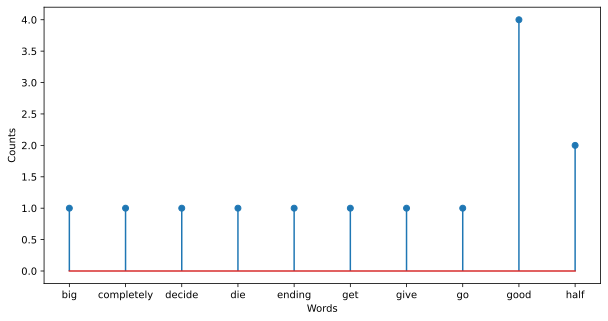

In [ ]:
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

## 3.2 Representation TF-IDF

One problem with BoW is that the frequency of very frequent words start to dominate in the document with respect to the rest; for example, very common verbs or terms that are common in the context of the corpus but do not have as much "information content" for the model as may be domain-specific words. Doing the vocabulary improvement we have seen that we can remove such frequent words, but this process is quite manual and it is better to have a robust vectorization than this.

To this end, the TF-IDF (Term Frequency-Inverse Document Frequency) representation proposes to readjust the frequency of words according to the frequency with which they appear in all documents, so that frequent word scores are penalized if they are also frequent in all documents. To do this, the TF-IDF involves the calculation of two values:

**Term Frequency (TF)**.
By term frequency $\text{TF}(w)$ we mean the number of times a given word $w$ occurs in a document (directly the value given by the BoW).

Sometimes this factor is redefined by dividing by the total number of words in that document or by the maximum frequency of some term in that document (to penalize long documents):

$$ \text{TF}(w,d) =\frac{\text{# times $w$ occurs in document $d$}}{\text{# total number of words in document $d$}}$$

**Inverse Document Frequency (IDF)**.

It is a measure of how much information the word $w$ provides, i.e., whether it is common or rare in all documents in the $D$ corpus. It is calculated as follows:
$$ \text{IDF}(w,D) =\log \frac{\text{# documents in the corpus}}{1+\text{# documents where the word $w$ appears}}$$

From these values the **TF-IDF** is calculated as follows:

$$\text{TF-IDF}(w,d,D) = \text{TF}(w,d) * \text{IDF}(w,D)$$

A high TF-IDF weight is achieved when the word has a high frequency in the document and, at the same time, a low frequency in the corpus; therefore, the weights tend to filter out terms that are common to many documents.

Note that, unlike BoW, for TF-IDF we have to learn the encoding jointly with the whole corpus. However, once we have computed the BoW for all documents, learning the TF-IDF model is straightforward using Gensim's [TfidfModel](https://radimrehurek.com/gensim/models/tfidfmodel.html) function.

In [ ]:
from gensim.models import TfidfModel

# fit TFIDF model for all the corpus
model = TfidfModel(corpus_bow)

# apply model to the first corpus document
vector = model[corpus_bow[0]]  # apply model to the first corpus document
print(vector)



[(0, 0.14659036149633042), (1, 0.09538870540852201), (2, 0.046060597055210165), (3, 0.06203266433058073), (4, 0.08304701694536977), (5, 0.04556863376007878), (6, 0.09338913058374114), (7, 0.08836431369760318), (8, 0.04517805412992079), (9, 0.055976335017854394), (10, 0.03065329494696355), (11, 0.1390363788387408), (12, 0.10363730439058788), (13, 0.0522519477164516), (14, 0.053072458004447716), (15, 0.08780110669093072), (16, 0.1018854403333182), (17, 0.07722079493973014), (18, 0.15293725539054068), (19, 0.053950720875055695), (20, 0.10646847986444416), (21, 0.11349485336090287), (22, 0.058556761740826406), (23, 0.07959482844521315), (24, 0.052050720826289476), (25, 0.0603695951378268), (26, 0.053950720875055695), (27, 0.054129434366684166), (28, 0.022913502643376847), (29, 0.06893158248012145), (30, 0.06447793322866029), (31, 0.09032164494174676), (32, 0.06537007496225165), (33, 0.08473362104893632), (34, 0.08330781620483073), (35, 0.13614440131637306), (36, 0.055317185377341815), (37,

#### **Exercise 8**: Get the TF-IDF of all documents in the corpus.

Store the output in a list called `corpus_tfifd` where each element of the list is the TF-IDF of a document, so that the output can then be parsed and represented.

In [ ]:
#<SOL>
# apply model to all corpus document
corpus_tfidf = model[corpus_bow]
#</SOL>

Let's analyze this transformation in comparison with the BoW.

In [ ]:
n_doc=50
print('Original document (after cleaning):')
print(corpus_prec[n_doc])
print('Sparse TFIDF vector representation (first 10 components):')
print(corpus_tfidf[n_doc][:10])
print('Word counts for the document (first 10 components):')
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[n_doc][:10]]
print(list_word_counts)
print('TF-IDF for the document (first 10 components):')
list_tfidf = [(D[doc_tfidf[0]], doc_tfidf[1]) for doc_tfidf in corpus_tfidf[n_doc][:10]]
print(list_tfidf)

Original document (after cleaning):
['giant', 'movie', 'price', 'worth', 'cost', 'admission', 'free', 'lamely', 'direct', 'michael', 'lehmann', 'picture', 'try', 'comedy', 'reuse', 'giant', 'joke', 'book', 'goliath', 'david', 'punk', 'throwing', 'rock', 'languidly', 'pace', 'movie', 'increasingly', 'lugubrious', 'screenplay', 'david', 'seltzer', 'oman', 'meander', 'sad', 'ending', 'rarely', 'funny', 'convincingly', 'dramatic', 'filmmaker', 'think', 'remain', 'mystery', 'nice', 'visual', 'recommend', 'picture', 'great', 'film', 'comedy', 'belt', 'harry', 'meet', 'sally', 'original', 'city', 'slicker', 'billy', 'crystal', 'show', 'world', 'good', 'oscar', 'host', 'propensity', 'choose', 'hopeless', 'material', 'year', 'father', 'day', 'year', 'giant', 'wonder', 'read', 'script', 'agree', 'ahead', 'project', 'surely', 'read', 'giant', 'show', 'think', 'ad', 'lib', 'success', 'maybe', 'want', 'dramatic', 'actor', 'think', 'movie', 'somber', 'tone', 'charitable', 'thing', 'say', 'ineffectua

<ipython-input-54-7f1aab5f1db9>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(words,counts, use_line_collection = True)


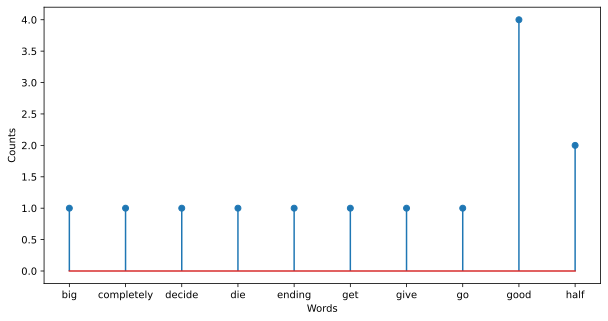

In [ ]:
#Plot BoW
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

<ipython-input-55-daa1748c8849>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(words,counts, use_line_collection = True)


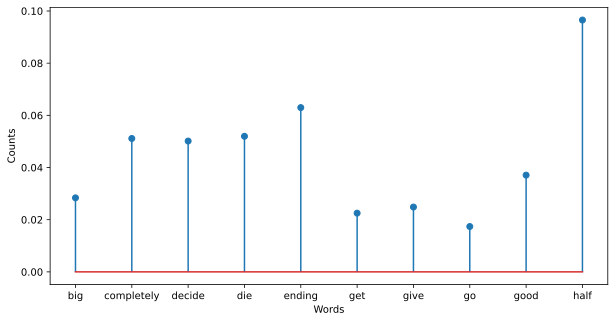

In [ ]:
#Plot TF-IDF
(words, counts) = zip(*list_tfidf)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

Compare both representations... Which words had more/less weight in the BoW representation? And in the TF-IDF representation?

## 3.3 BOW and TF-IDF in sklearn

Sklearn also includes functions for tokenization and vectorization of documents. Specifically, it has the functions:
* [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) which implements both tokenization and word count (BoW) in a single class.
* [`TfidfTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer) which is responsible for obtaining the TF-IDF representation from a BoW representation.

* [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) which is equivalent to using `CountVectorizer()` followed by `TfidfTransformer()`.

Let's see how these methods work and what they allow us to do.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# We start from a raw corpus
corpus_example = [
     'This is the first document of my book.',
     'This document is a new document.',
     'And this is the document 3.',
     'Is this the best document??']

# Define the CountVectorizer method
vectorizer = CountVectorizer()
# and fit it!
vectorizer.fit(corpus_example)
# Now, we can obtain the bow of any text (or the corpus)
X = vectorizer.transform(corpus_example)
print(X.toarray()) # By default, it is a sparse matrix

[[0 0 1 1 1 1 1 0 1 1 1]
 [0 0 0 2 0 1 0 1 0 0 1]
 [1 0 0 1 0 1 0 0 0 1 1]
 [0 1 0 1 0 1 0 0 0 1 1]]


In [ ]:
# We can access to the vocabulary
vectorizer.vocabulary_

{'this': 10,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 'of': 8,
 'my': 6,
 'book': 2,
 'new': 7,
 'and': 0,
 'best': 1}

The default configuration tokenizes every text, converts everything to lowercase and extracts words of at least 2 letters (we see that it has removed `'a'` and `'3'` as they are single character tokens); it also removes punctuation.

If we want, `CountVectorizer` lets us include some additional functionalities such as:
* Include a list of *stop words* with the `stop_words` parameter.
* Refine the dictionary in a similar way as Gensim does with the following parameters:
  * `min_df`: threshold to ignore terms appearing in less than `min_df` documents.
  * `max_df`: threshold to ignore terms appearing in more than `max_df` documents.  
  * `max_features`: number of terms to include in the dictionary (keeps the most frequent `max_features` words).


In the following example we see how to include a filtering of *stop words*.


In [ ]:
# Adding n-grams of minimum length 1 and maximum length of 2
vectorizer2 = CountVectorizer(stop_words='english')
X2 = vectorizer2.fit_transform(corpus_example)
print(vectorizer2.get_feature_names_out())

['best' 'book' 'document' 'new']


Despite all these facilities, it may happen that we want to include additional steps in our preprocessing (treatment of accents, contractions, numbers, ...) and for this it is not enough to configure these parameters. In this case we have two options:
* Use NLTK + Gensim.
* Include our preprocessing with NLTK on the sklearn class.

To carry out this second option, the easiest way is to define a class or object in charge of applying the desired preprocessing and pass it to `CountVectorizer` in the `analyzer` parameter. Let's see how to apply it with our example.

In [ ]:
# create a custom analyzer class
class MyTextPreprocessing(object):

    def __init__(self):
        ## Load Modules
        self.lemmatizer  = WordNetLemmatizer()
        self.stopwords_en   = set(nltk.corpus.stopwords.words('english'))
        self.punctuation = string.punctuation

    # allow the class instance to be called just like
    # a function that applies the preprocessing
    def __call__(self, text):
        # change to lower case and remove punctuation
        text2 = text.lower().translate(str.maketrans(string.punctuation, ' '*(len(string.punctuation))))
        # we tokenize
        text_tokens = nltk.word_tokenize(text2)
        # we lemmatize and remove stop-words
        normalized_text  = [lemmatizer.lemmatize(t) for t in text_tokens if (t not in stopwords_en)]

        return normalized_text

analyzer = MyTextPreprocessing()
custom_vec = CountVectorizer(analyzer=analyzer)
X_example = custom_vec.fit_transform(corpus_example)
tokens = custom_vec.get_feature_names_out()
print(tokens)

['3' 'best' 'book' 'document' 'first' 'new']


If we apply it to our corpus of documents

In [ ]:
# We read the entire corpus
corpus = []
for fileid in movie_reviews.fileids():
  text = movie_reviews.raw(fileid)
  corpus.append(text)

# We include the cleaning of the dictionary
no_below = 10 # Minimum number of documents to keep a term in the dictionary
no_above = .8 # Maximum proportion of documents in which a term can appear to be kept in the dictionary
keep_n = 2000

analyzer = MyTextPreprocessing()
custom_vec = CountVectorizer(analyzer=analyzer, min_df= no_below, max_df =no_above, max_features= keep_n)
X_bow = custom_vec.fit_transform(corpus)
tokens = custom_vec.get_feature_names_out()
print(tokens)

NameError: ignored

In [ ]:
print('Original document')
print(corpus[0][:100])
print('Sparse vector representation (first 10 components):')
print(X_bow[0,:].data[:10])
print('Pair of words a count values (first 10 components):')
list_word_counts = [(tokens[index], X_bow[0,index]) for index in X_bow[0,:].indices[:10]]
print(list_word_counts)



Original document
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 

Sparse vector representation (first 10 components):
[1 2 4 1 2 1 1 1 3 1]
Pair of words a count values (first 10 components):
[('plot', 1), ('two', 2), ('teen', 4), ('couple', 1), ('go', 2), ('church', 1), ('party', 1), ('drive', 1), ('get', 3), ('accident', 1)]


If we want to obtain the TF-IDF from the BoW, we can use the function `TfidfTransformer`.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
vectorizerTFIDF = TfidfTransformer()
vectorizerTFIDF.fit(X_example)
X_tfidf_example =  vectorizerTFIDF.transform(X_example)
print(X_tfidf_example.toarray())

[[0.         0.         0.66338461 0.34618161 0.66338461 0.        ]
 [0.         0.         0.         0.722056   0.         0.69183461]
 [0.88654763 0.         0.         0.46263733 0.         0.        ]
 [0.         0.88654763 0.         0.46263733 0.         0.        ]]


We can include everything in a pipeline

*Note: A **pipeline** is a sklearn method that allows us to define a sequence of functions and work with them as a single one, facilitating the training, validation and testing of models composed by sequences of methods.*

In [ ]:
from sklearn.pipeline import Pipeline
# Define the steps of the pipeline
pipe = Pipeline([('count', CountVectorizer()),
                  ('tfid', TfidfTransformer())])
# Train all the steps of the pipeline
pipe.fit(corpus_example)
# Get new outputs of the overall pipeline
pipe.transform(corpus_example).toarray()


array([[0.        , 0.        , 0.43750519, 0.22830836, 0.43750519,
        0.22830836, 0.43750519, 0.        , 0.43750519, 0.27925389,
        0.22830836],
       [0.        , 0.        , 0.        , 0.64308448, 0.        ,
        0.32154224, 0.        , 0.61616842, 0.        , 0.        ,
        0.32154224],
       [0.67049706, 0.        , 0.        , 0.34989318, 0.        ,
        0.34989318, 0.        , 0.        , 0.        , 0.42796959,
        0.34989318],
       [0.        , 0.67049706, 0.        , 0.34989318, 0.        ,
        0.34989318, 0.        , 0.        , 0.        , 0.42796959,
        0.34989318]])

Or directly use the `TfidfVectorizer` class

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(corpus_example).toarray()


array([[0.        , 0.        , 0.43750519, 0.22830836, 0.43750519,
        0.22830836, 0.43750519, 0.        , 0.43750519, 0.27925389,
        0.22830836],
       [0.        , 0.        , 0.        , 0.64308448, 0.        ,
        0.32154224, 0.        , 0.61616842, 0.        , 0.        ,
        0.32154224],
       [0.67049706, 0.        , 0.        , 0.34989318, 0.        ,
        0.34989318, 0.        , 0.        , 0.        , 0.42796959,
        0.34989318],
       [0.        , 0.67049706, 0.        , 0.34989318, 0.        ,
        0.34989318, 0.        , 0.        , 0.        , 0.42796959,
        0.34989318]])

# 4. Text classification with *Naive Bayes*

Once we have the vector representation of our documents, we can use this representation to train a learning model.  There are many models that we can use in this problem to classify our reviews into positive and negative, but we will now look at the Naive Bayes model, since it is a fairly common and efficient strategy for document classification despite being called "naive".

If our movie reviews contain the terms *enchanting*, *great*, *awesome*, *surprising*, what is the probability of the review being positive, is it greater than the probability of being negative?

Basically a Bayesian classifier will learn the probabilities that the review is bad/good in light  of the words that make it up (the a posteriori probabilities of each class), i.e., it will learn:
* Probability that the $i$-th document is positive given the content of the document (the words that make it up, its BoW, TF-IDF, ...): $ P(y_i=1|{\bf x}_i)$
* Probability that the document $i$ is negative given its content: $ P(y_i=-1|{\bf x}_i)$

And, then, the classifier will decide that the $i$-th document belongs to the positive ($m=1$) or negative ($m=-1$) class (or in a general multi-class case to $m=1, \ldots, M$) by applying a MAP criterion:

$$\hat{y}_i = argmax_m P(y_i=m|{\bf x}_i)$$

To calculate these a posteriori probabilities, Bayes' Theorem is applied, so that:
$$ P(y=m|{\bf x}) = \frac{P(y=m) p({\bf x}|y=m)}{p({\bf x})}$$

The Navie Bayes model simplifies the calculation of these probabilities by considering the class likelihood independent over all document words, that is,

$$p({\bf x}|y=m) = \prod_{d=1}^{D}{p(x_d|y=m) } $$

Which leads to the MAP classifier can be obtained as:

$$\hat{y} = argmax_m P(y=m|{\bf x}) = argmax_m  P(y=m) \prod_{d=1}^{D}{p(x_d|y=m)}$$


This assumption of independence is almost never true in the documents we want to classify, since the language, grammatical rules and syntax usually generate correlations between words.
However, in spite of that *Naive Bayes* classifiers work quite well for document classification. This is mainly because by decoupling the distributions of each word we only have to estimate parameters from one-dimensional distributions, which allows us to estimate the necessary parameters with little training data. In addition, this makes considerably faster than other more sophisticated methods.


Sklearn includes several implementations of Naive Bayes classifiers considering different types of distributions, but for working with vector representations of texts, the most common implementations are the following:
* Multinomial Naive Bayes
* Complement Naive Bayes

### 4.1 *Multinomial Naive Bayes*

The classifier [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) directly estimates the probabilities of the word $d$ appearing in a document of the class $y$, i.e,

$$ \hat{p}(x_d|y=m) = \frac{N_{d,m} + \alpha}{N_m + \alpha D} $$

where $N_{d,m}$ is the number of times the word $d$ appears in all documents of class $m$, $N_m = \sum_{d=1}^D N_{d,m}$ is the total number of words in all documents of class $m$ and $\alpha$ is a smoothing parameter to avoid divisions by zero. The values of $N_{d,m}$ can be obtained directly from the BoW representation of each document, but using TF-IDF representations also gives good results.

### 4.2 *Complement Naive Bayes*

[`ComplementNB`](https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes) is an adaptation of the previous algorithm to work on the complementary probabilities of each class; thus, it tends to provide more stable estimates of the probabilities of each word, mainly in unbalanced problems, tending to improve considerably the previous version.

In this case the model decides according to the rule:

$$\hat{y} = argmin_m P(y \neq m|{\bf x}) = argmax_m  P(y \neq m) \prod_{d=1}^{D}{p_c(x_d|m)}$$

where $p_c(x_d|m)$ is the complementary probability of class $m$ and is approximated by:

$$ p_c(x_d|m) = \frac{w_{d,m}}{\sum_{m' = 1}^M w_{d,m'}}$$

being $w_{d,m}$ the complementary weight of the word $d$ in the class $m$ given by:

$$w_{d,m} = \log{ \frac{\sum_{m' \neq m} N_{d,m'} + \alpha_d}{\sum_{d'} \sum_{m' \neq m} N_{d',m'} + \sum_{d'} \alpha_{d'}}} $$

where as before the values of $N_{d,m}$ can be obtained directly from the BoW or TFIDF representation of each document.

Let's see how to use these classifiers with our data corpus. To do this, let's start by loading the problem labels.

In [ ]:
Y = []
for fileid in movie_reviews.fileids():
  if movie_reviews.categories(fileid)[0]=='neg':
    Y.append(-1)
  else:
    Y.append(1)
Y = np.array(Y)
print(Y)

[-1 -1 -1 ...  1  1  1]


Secondly, if we use the vectorization we have done with Gensim, in order to use the sklearn libraries, we have to convert our vector representation into numpy arrays. To do this, gensim includes two functions: [corpus2dense](https://tedboy.github.io/nlps/generated/generated/gensim.matutils.corpus2dense.html), [corpus2csc](https://tedboy.github.io/nlps/generated/generated/gensim.matutils.corpus2csc.html).


In [ ]:
from gensim.matutils import corpus2dense, corpus2csc

n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert BoW representacion
corpus_bow_dense = corpus2dense(corpus_bow, num_terms=n_tokens, num_docs=num_docs).T
corpus_bow_sparse = corpus2csc(corpus_bow, num_terms=n_tokens, num_docs=num_docs).T
# Convert TFIDF representacion
corpus_tfidf_dense = corpus2dense(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T
corpus_tfidf_sparse = corpus2csc(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T

Let's see what these transformations have done, for example, for the BoW representation:

In [ ]:
print(corpus_bow[50])

[(7, 1), (14, 1), (24, 1), (26, 1), (32, 1), (50, 1), (52, 1), (53, 1), (54, 4), (57, 2), (65, 1), (66, 1), (68, 1), (69, 1), (92, 1), (96, 1), (101, 1), (103, 1), (104, 1), (105, 2), (108, 2), (118, 1), (120, 1), (122, 1), (123, 1), (127, 1), (129, 1), (131, 1), (134, 2), (154, 1), (156, 1), (162, 1), (166, 1), (174, 1), (182, 2), (223, 1), (227, 1), (228, 1), (242, 2), (243, 2), (260, 1), (280, 2), (294, 1), (299, 1), (308, 1), (317, 1), (320, 1), (334, 2), (354, 1), (360, 1), (367, 1), (373, 1), (409, 2), (410, 1), (415, 1), (456, 1), (473, 1), (500, 1), (513, 3), (514, 1), (554, 1), (565, 1), (583, 1), (591, 1), (605, 1), (606, 1), (612, 2), (620, 1), (652, 2), (663, 2), (671, 1), (689, 1), (702, 1), (703, 1), (704, 1), (720, 1), (723, 1), (729, 1), (734, 3), (736, 1), (739, 1), (746, 1), (754, 2), (771, 2), (774, 1), (783, 1), (784, 1), (786, 1), (788, 1), (793, 1), (805, 1), (806, 2), (811, 1), (812, 1), (821, 1), (824, 1), (828, 1), (856, 1), (877, 1), (903, 1), (920, 1), (932, 

In [ ]:
print(corpus_bow_dense[50,:20])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
print(corpus_bow_sparse[50,:20])

  (0, 7)	1.0
  (0, 14)	1.0


In general, when we have a large corpus of data, we will be interested in handling the sparse representation of the data to save on computational cost. If in our ML processing we use sklearn we will be able to work with this sparse format since most classifiers/regressors can work with both data (dense and sparse).


#### **Exercise 9**: Training a *Navie Bayes* and a *Complement Navie Bayes* classifier

Complete the following code to train and evaluate the *Navie Bayes* classifiers seen earlier. The code begins by splitting the data sets into training and test so that you can evaluate the classifier's performance.

In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split
# Code for BoW representation

# Divide the data into train test partitions
id_tot = np.arange(corpus_bow_sparse.shape[0])
id_train, id_test = train_test_split(id_tot, test_size=0.4, random_state=42)

X_train = corpus_bow_sparse[id_train,:]
X_test = corpus_bow_sparse[id_test,:]
y_train = Y[id_train]
y_test = Y[id_test]

# <SOL>
clf = MultinomialNB()
clf.fit(X_train, y_train)
print('Accuracy Naive Bayes')
print(clf.score(X_test, y_test))

clf = ComplementNB()
clf.fit(X_train, y_train)
print('Accuracy Complement Naive Bayes')
print(clf.score(X_test, y_test))

# </SOL>

Accuracy Naive Bayes
0.81125
Accuracy Complement Naive Bayes
0.81125


In [ ]:
# Code for TF-IDF representation

# Divide the data into train test partitions
X_train = corpus_tfidf_sparse[id_train,:]
X_test = corpus_tfidf_sparse[id_test,:]

# <SOL>
clf = MultinomialNB()
clf.fit(X_train, y_train)
print('Accuracy Naive Bayes')
print(clf.score(X_test, y_test))

clf = ComplementNB()
clf.fit(X_train, y_train)
print('Accuracy Complement Naive Bayes')
print(clf.score(X_test, y_test))
# </SOL>

Accuracy Naive Bayes
0.81875
Accuracy Complement Naive Bayes
0.81625


Being a binary problem, there is no difference between the Naive Bayes implementation and its complementary one. Moreover, in this case, we also see no difference between using the BoW representation and the TF-IDF, but as we will see throughout the course the TF-IDF representation usually provides better results.

## 4.3 Data normalization?

So far we have always seen in our ML pipeline that we should normalize the data by columns (by features) before passing it to the learning model.

But working with text vector representations like BoW or TF-IDF, do we need to normalize? Although there is no closed answer, the most accepted idea is that BoW or TF-IDF representations or other NLP transformations that we will see later should be left as they are for best results.

This is because the normalization of BoW variables is not considered natural, we lose the importance of each word within the document. While the TF-IDF encoding is already considered to be normalized; note that:
* The TF calculation normalizes each document to length 1 (row normalization), eliminating dependency on longer or shorter documents.
* Second, the IDF is an inter-document normalization that gives less weight to common terms and more to rare ones (column normalization), normalizing (weighting) each word with the inverse frequency of the corpus.

So the TF-IDF is intended to be used in its direct form in an algorithm.

However, as we will see, algorithms such as K-means which are usually very sensitive to feature scaling, IDF weighting helps to improve the clustering result and therefore better results are usually obtained with TF-IDF representations than with BOW.

## 4.4 Calculating distances between BoW and TF-IDF representations

Once we have the vector representation of our documents (each of the rows of the BoW or TFIDF matrix), many of our ML models will need to compute similarities between them, such as a K-NN algorithm for classification/regression or a K-means for clustering. For this, when working with BoW or TFIDF features, where the magnitude of the vectors does not matter, **cosine similarity** is often used as a metric.

We might assume that when a word (e.g., *science*) appears more frequently in document 1 than in document 2, that document 1 is more related to the *science* topic. However, it could also be the case that we are working with documents of unequal lengths (Wikipedia articles, for example). In this case, *science* is likely to appear more in document 1 just because it is much longer than document 2. The cosine similarity corrects for this.

For this reason, when working with BoW or TF-IDF encoded documents, cosine similarity tends to be used. If $\mathbf{v}_1$ and $\mathbf{v}_2$ are two TF-IDF vectors, the cosine similarity is calculated as follows:


$$\text{cos}(\mathbf{v}_1,\mathbf{v}_2) = \frac{\mathbf{v}_1^T~\mathbf{v}_2}{||\mathbf{v}_1||_2 ||\mathbf{v}_2||}$$

Or, rather the cosine distance defined as $1-\text{cos}(\mathbf{v}_1,\mathbf{v}_2)$ is used, i.e.,

$$d_\text{cos}(\mathbf{v}_1,\mathbf{v}_2) = 1- \frac{\mathbf{v}_1^T~\mathbf{v}_2}{||\mathbf{v}_1||_2 ||\mathbf{v}_2||}$$



<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/NLP/NLP1.png" width="100%">

And as we can see in the following figure, their results have nothing to do with the Euclidean distance (they don't depend on the length of the vectors)

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/NLP/NLP2.png" width="60%">


Another aspect we have to take into account is that the cosine distance is not a distance as such (it does not satisfy the triangular inequality) and default implementations of our learning models such as sklearn's K-NN or K-means use the default Euclidean distance and do not allow to include the cosine distance.

To solve this problem we have two options:
* Use other implementations such as NLTK's K-means which allows us to use the cosine distance. Although the problem with this implementation is that it does not allow us to work with sparse matrices.
* Rescale our data to be able to use implementations based on the Euclidean distance...

Let's see how to do the latter...



## 4.5 K-NN with *cosine* distance

As we have just mentioned, we cannot use the K-means or K-NN libraries of sklearn with BOW or TF-IDF representations because they only allow us to use the Euclidean distance.

However, when our vectors $x$ and $y$ are normalized ($||x||^2 = x^Tx = 1$), their Euclidean distances $||x-y||^2$ and cosine $d(x,y)$ are related by the following equality:

$$||x-y||^2 = x^Tx + y^Ty - 2 x^Ty = 2 (1 - x^Ty) = 2 d(x,y)$$

In this case, using the Euclidean distance will give us the same results as the cosine distance.

Note that this normalization is similar to the TF calculation that compensates in the BoW representation for the length of the documents.

So let's start by normalizing our data so that each vector has unit norm (we are going to do it on the sparse representations).

In [ ]:
from scipy import sparse

def normalize_sparse_vector(s):
  norm_s = np.array(np.sqrt(s.multiply(s).sum(1)))
  pos_zero = np.where(np.sqrt(s.multiply(s).sum(1))==0)[0]
  norm_s[pos_zero] = 1
  return s.multiply(sparse.csr_matrix(1/norm_s))

corpus_bow_sparse_norm = normalize_sparse_vector(corpus_bow_sparse)
corpus_tfidf_sparse_norm = normalize_sparse_vector(corpus_tfidf_sparse)

Now let's classify our documents with sklearn's K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Code for BoW representation

# Divide the data into train test partitions
X_train = corpus_bow_sparse[id_train,:]
X_test = corpus_bow_sparse[id_test,:]

X_train_norm = corpus_bow_sparse_norm[id_train,:]
X_test_norm = corpus_bow_sparse_norm[id_test,:]

# <SOL>
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print('Accuracy K-NN without normalization')
print(clf.score(X_test, y_test))

clf = KNeighborsClassifier()
clf.fit(X_train_norm, y_train)
print('Accuracy K-NN with normalization (cosine distance)')
print(clf.score(X_test_norm, y_test))
# </SOL>

Accuracy K-NN without normalization
0.58875
Accuracy K-NN with normalization (cosine distance)
0.705


In [ ]:
# Code for TFIDF representation

# Divide the data into train test partitions
X_train = corpus_tfidf_sparse[id_train,:]
X_test = corpus_tfidf_sparse[id_test,:]

X_train_norm = corpus_tfidf_sparse_norm[id_train,:]
X_test_norm = corpus_tfidf_sparse_norm[id_test,:]

# <SOL>
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print('Accuracy K-NN without normalization')
print(clf.score(X_test, y_test))

clf = KNeighborsClassifier()
clf.fit(X_train_norm, y_train)
print('Accuracy K-NN with normalization (cosine distance)')
print(clf.score(X_test_norm, y_test))
# </SOL>

Accuracy K-NN without normalization
0.6575
Accuracy K-NN with normalization (cosine distance)
0.6575
